## **Importing libraries**

In [38]:
import pickle

import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

## **Reading Data**

In [39]:
df = pd.read_csv("data/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


There is 1 milion row and 8 float feature in dataset.

In [40]:
df.shape

(1000000, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Most of the features are binary. And the rest of features have otliers.

In [42]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## **Visualization**

This dataset is unbalanced. Only 8% of the data is fraud. 

<AxesSubplot:>

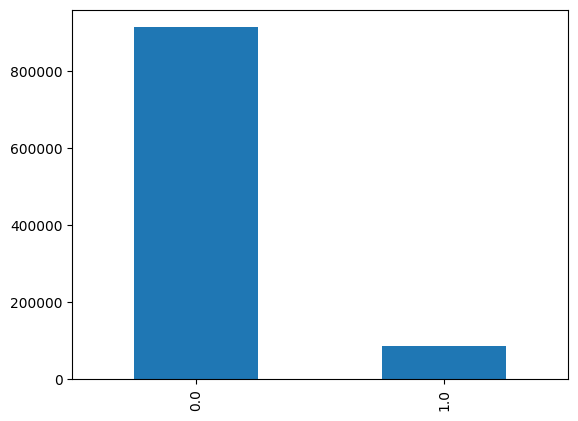

In [43]:
df["fraud"].value_counts().plot(kind="bar")

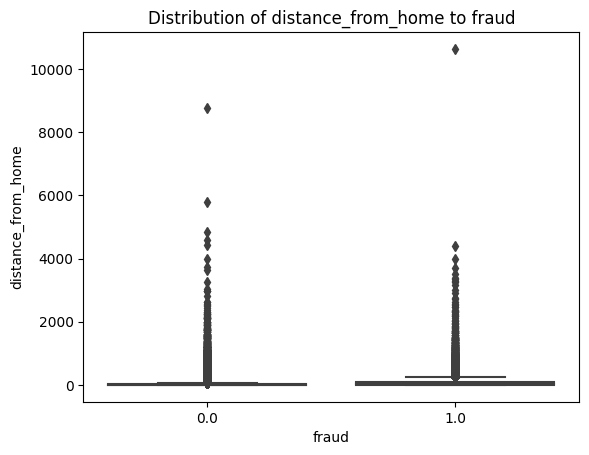

In [44]:
ax = sns.boxplot(data=df, y=df["distance_from_home"], x=df["fraud"]).set_title("Distribution of distance_from_home to fraud")

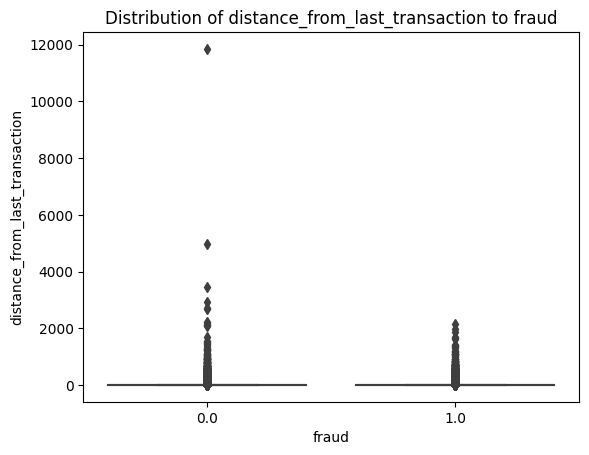

In [45]:
ax = sns.boxplot(data=df, x=df["fraud"], y=df["distance_from_last_transaction"]).set_title("Distribution of distance_from_last_transaction to fraud")

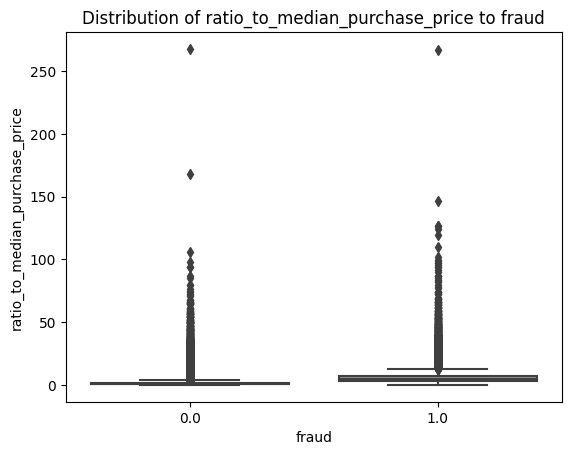

In [46]:
ax = sns.boxplot(data=df, x="fraud", y="ratio_to_median_purchase_price").set_title("Distribution of ratio_to_median_purchase_price to fraud")

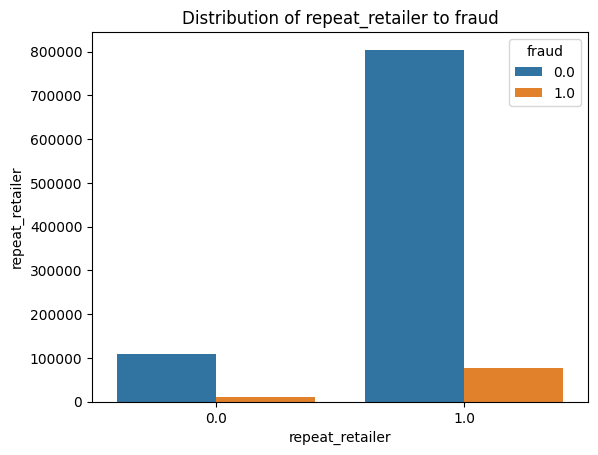

In [47]:
temp = df.groupby("fraud")["repeat_retailer"].value_counts().reset_index(level="fraud")
ax = sns.barplot(x=temp.index, y=temp["repeat_retailer"], hue=temp["fraud"]).set_title("Distribution of repeat_retailer to fraud")

Text(0.5, 1.0, 'Distribution of used_chip to fraud')

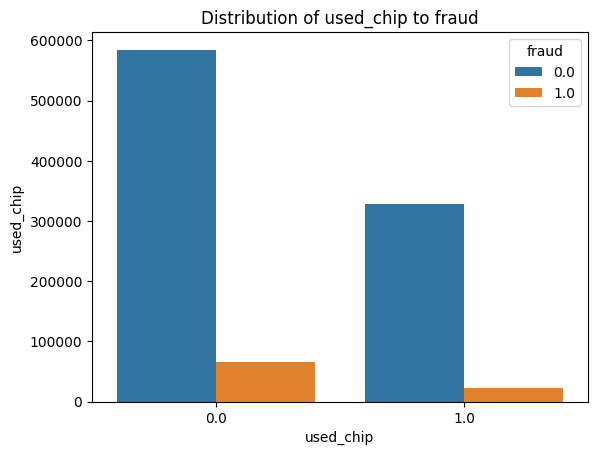

In [48]:
temp = df.groupby("fraud")["used_chip"].value_counts().reset_index(level="fraud")
sns.barplot(x=temp.index, y=temp["used_chip"], hue=temp["fraud"]).set_title("Distribution of used_chip to fraud")

Text(0.5, 1.0, 'Distribution of used_pin_number to fraud')

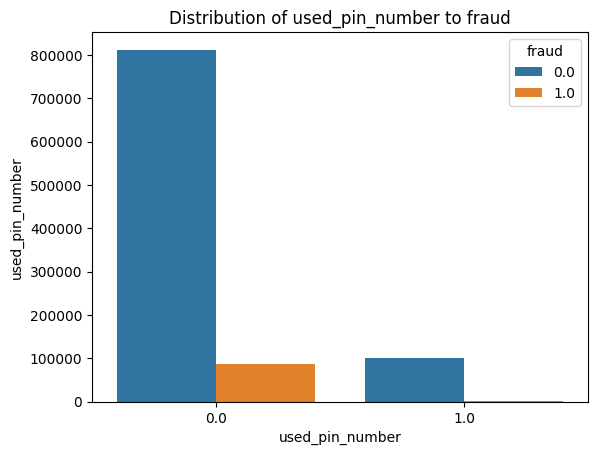

In [49]:
temp = df.groupby("fraud")["used_pin_number"].value_counts().reset_index(level="fraud")
sns.barplot(x=temp.index, y=temp["used_pin_number"], hue=temp["fraud"]).set_title("Distribution of used_pin_number to fraud")

Text(0.5, 1.0, 'Distribution of online_order to fraud')

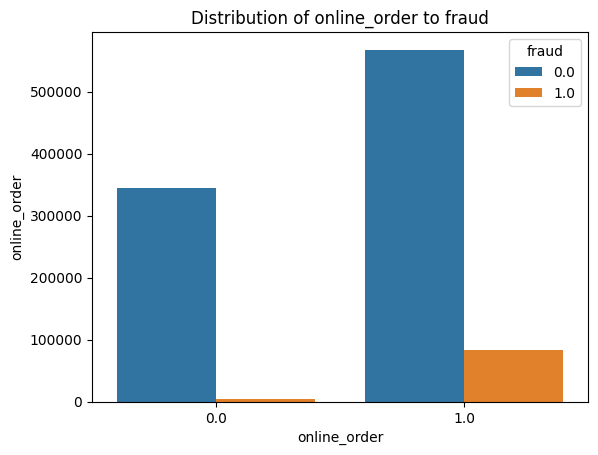

In [50]:
temp = df.groupby("fraud")["online_order"].value_counts().reset_index(level="fraud")
sns.barplot(x=temp.index, y=temp["online_order"], hue=temp["fraud"]).set_title("Distribution of online_order to fraud")

## **Preprocessing**

In [51]:
df[df.fraud == 1.0]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


Defining the target variable

In [52]:
y = df["fraud"]
df = df.drop(["fraud"], axis=1)

Split the data to train and test.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1504)

Used min-max scaler to all features came same range.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]] = scaler.fit_transform(X_train[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]]) 
X_test[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]] = scaler.transform(X_test[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]]) 

Save it for later use.

In [55]:
with open("models/preprocess.pkl", 'wb') as f:
    pickle.dump(scaler, f)

In [56]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
265429,0.001181,0.000014,0.000386,1.0,1.0,0.0,0.0
327450,0.000319,0.000221,0.010310,1.0,1.0,0.0,0.0
280528,0.000729,0.000342,0.001844,1.0,0.0,0.0,1.0
912689,0.000031,0.003589,0.000582,0.0,1.0,0.0,1.0
462807,0.000441,0.000031,0.004953,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
63939,0.003211,0.000119,0.009340,1.0,0.0,0.0,1.0
535133,0.001353,0.000784,0.004295,1.0,0.0,0.0,1.0
893569,0.004357,0.000048,0.005057,1.0,0.0,0.0,0.0
707360,0.001643,0.001484,0.000274,1.0,1.0,0.0,1.0


## **Modelling**

In [57]:
clf = RandomForestClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train)

In [58]:
clf.feature_names_in_

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'], dtype=object)

In [59]:
print(classification_report(y_test, clf.predict(X_test), target_names=["0.0","1.0"]))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273765
         1.0       1.00      1.00      1.00     26235

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [60]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[273765      0]
 [     3  26232]]


In [61]:
with open("models/model.pkl", 'wb') as f:
    pickle.dump(clf, f)

In [62]:
loaded_model = pickle.load(open("models/model.pkl", 'rb'))
result = loaded_model.score(X_test, y_test)
print(f"Accuracy Score : {result}")

Accuracy Score : 0.99999
